In [1]:
import pandas as pd 
import numpy as np 
import sklearn
from dir import *
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset, Subset
from sklearn.model_selection import train_test_split
from VAE_model import *
from VAE_model_single import *
from training import *
from extras import *
plt.style.use('ggplot')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1) Data exploration 

## 1.1) General data exploration

In [2]:
large_data = pd.read_csv("data/F4_complete_presence_absence.csv", index_col=[0], header=[0])

In [3]:
large_data

,41004_G02_contigs_pacbio,50884_F01_contigs_pacbio,AIAW00000000,AIBY00000000,AIFN00000000,NC_002655,NC_002695,NC_011353,NC_013008,NC_017906,...,esc_pa2010aa_as,esc_pa2013aa_as,esc_pa2014aa_as,esc_pa2016aa_as,esc_pa2019aa_as,esc_pa2021aa_as,esc_pa2023aa_as,esc_pa2315aa_as,esc_ra2551aa_as,esc_ra2561aa_as
Strain,,,,,,,,,,,,,,,,,,,,,
Lineage,1,1,1,1,1,1,1,1,1,1,...,51,51,51,51,51,51,51,51,51,51
group_5501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_4783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_4456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_6055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
group_2149_7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_2067_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_2068_8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
large_data.columns = large_data.columns.str.upper()

In [5]:
large_data

,41004_G02_CONTIGS_PACBIO,50884_F01_CONTIGS_PACBIO,AIAW00000000,AIBY00000000,AIFN00000000,NC_002655,NC_002695,NC_011353,NC_013008,NC_017906,...,ESC_PA2010AA_AS,ESC_PA2013AA_AS,ESC_PA2014AA_AS,ESC_PA2016AA_AS,ESC_PA2019AA_AS,ESC_PA2021AA_AS,ESC_PA2023AA_AS,ESC_PA2315AA_AS,ESC_RA2551AA_AS,ESC_RA2561AA_AS
Strain,,,,,,,,,,,,,,,,,,,,,
Lineage,1,1,1,1,1,1,1,1,1,1,...,51,51,51,51,51,51,51,51,51,51
group_5501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_4783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_4456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_6055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
group_2149_7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_2067_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_2068_8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
phylogroup_data = pd.read_csv("data/accessionID_phylogroup_BD.csv", index_col=[0], header=[0])

In [7]:
phylogroup_data

,Phylogroup
ID,
ESC_CA4458AA_AS,E
ESC_CA5810AA_AS,E
11657_7#79,B2
ESC_SA7073AA_AS,B1
SRS3528668,Not Determined
...,...
39111_C02,Not determined
ESC_SA2343AA_AS,E
ESC_SA2344AA_AS,E


In [8]:
data_without_lineage = large_data.drop(index=['Lineage'])
row_sums = data_without_lineage.sum(axis=1)
data_without_lineage = data_without_lineage[row_sums / 7512 >= 0.05]

large_data_t = np.array(data_without_lineage.transpose())
large_data_t = large_data_t[:,1:]
print(f"Dataset shape: {large_data_t.shape}")


Dataset shape: (7512, 8017)


In [9]:
threshold_data = []
thresholds = np.linspace(0, 50, num=50)
data_without_lineage = large_data.drop(index=['Lineage'])

for i in thresholds:
    row_sums = data_without_lineage.sum(axis=1)
    threshold_data.append(len(data_without_lineage[row_sums >= i]))


In [10]:
threshold_data

[55039,
 39817,
 34175,
 31251,
 29493,
 28022,
 26984,
 26150,
 25329,
 24655,
 23910,
 23405,
 23055,
 22662,
 22335,
 22042,
 21711,
 21396,
 21133,
 20878,
 20538,
 20274,
 19950,
 19661,
 19396,
 19047,
 18595,
 18291,
 18111,
 17957,
 17835,
 17722,
 17594,
 17461,
 17326,
 17186,
 16983,
 16857,
 16742,
 16609,
 16420,
 16044,
 15885,
 15772,
 15681,
 15576,
 15439,
 15336,
 15223,
 15120]

In [11]:
data_without_lineage[row_sums / 7512 >= 0.05]

,41004_G02_CONTIGS_PACBIO,50884_F01_CONTIGS_PACBIO,AIAW00000000,AIBY00000000,AIFN00000000,NC_002655,NC_002695,NC_011353,NC_013008,NC_017906,...,ESC_PA2010AA_AS,ESC_PA2013AA_AS,ESC_PA2014AA_AS,ESC_PA2016AA_AS,ESC_PA2019AA_AS,ESC_PA2021AA_AS,ESC_PA2023AA_AS,ESC_PA2315AA_AS,ESC_RA2551AA_AS,ESC_RA2561AA_AS
Strain,,,,,,,,,,,,,,,,,,,,,
group_5501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_2859,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_6054,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
group_3797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_7438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
group_2359_5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
prpR_2_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_2485_10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# threshold_data

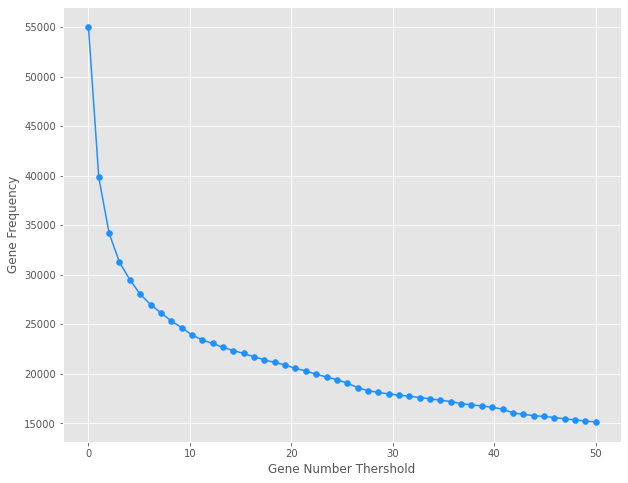

In [13]:
plt.figure(figsize=(10,8))
plt.scatter(thresholds, threshold_data, color='dodgerblue')
plt.plot(thresholds, threshold_data, color='dodgerblue')
plt.xlabel("Gene Number Thershold")
plt.ylabel("Gene Frequency")
plt.savefig("figures/gene_frequency_2.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [14]:
# large_data[row_sums >= 2]


In [15]:
frequency1 = large_data.sum(axis=1)

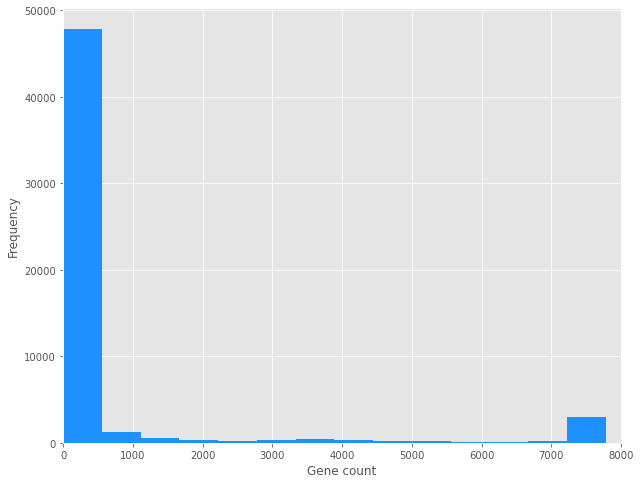

In [16]:
plt.figure(figsize=(10,8))
plt.hist(frequency1, color='dodgerblue', bins=100)
plt.xlim(0, 8000)
plt.xlabel('Gene count')
plt.ylabel('Frequency')
plt.savefig("figures/gene_count_2.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [17]:
frequency2 = large_data.sum(0)

In [18]:
# plt.figure(figsize=(10,8))
# plt.hist(frequency2, bin=20, color='dodgerblue')
# plt.xlabel('Genome size')
# plt.ylabel('Gene Gamily Frequency')
# plt.savefig("gene_size_2.pdf", format="pdf", bbox_inches="tight")
# plt.show()

In [19]:
row_sums = large_data.sum(axis=1)
filtered_data = large_data[row_sums >= 2]

In [20]:
large_data_t = np.array(filtered_data.transpose())

In [21]:
large_data_t.shape

(7512, 39818)

In [22]:
large_data_t

array([[ 1,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0],
       ...,
       [51,  0,  0, ...,  0,  0,  0],
       [51,  0,  0, ...,  0,  0,  0],
       [51,  0,  0, ...,  0,  0,  0]])

In [23]:
large_data_t = large_data_t[:,1:]

In [24]:
large_data_t

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
large_data_t.shape

(7512, 39817)

## 1.2) PCA

In [26]:
data_without_lineage = large_data.drop(index=['Lineage'])
merged_df = pd.merge(data_without_lineage.transpose(), phylogroup_data, how='inner', left_index=True, right_on='ID')

In [27]:
merged_df

,group_5501,group_4783,group_4456,group_6055,group_2859,group_3832,group_4223,group_2401,group_1236,group_3245,...,group_2066_1,mukF_1,group_955_2,group_1382_5,group_2149_7,group_2067_4,group_2068_8,group_2069_3,group_2071_4,Phylogroup
ID,,,,,,,,,,,,,,,,,,,,,
AIAW00000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
AIBY00000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
AIFN00000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
NC_002655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
NC_002695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ESC_PA2021AA_AS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,D
ESC_PA2023AA_AS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,D
ESC_PA2315AA_AS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,D


In [28]:
data_without_lineage

,41004_G02_CONTIGS_PACBIO,50884_F01_CONTIGS_PACBIO,AIAW00000000,AIBY00000000,AIFN00000000,NC_002655,NC_002695,NC_011353,NC_013008,NC_017906,...,ESC_PA2010AA_AS,ESC_PA2013AA_AS,ESC_PA2014AA_AS,ESC_PA2016AA_AS,ESC_PA2019AA_AS,ESC_PA2021AA_AS,ESC_PA2023AA_AS,ESC_PA2315AA_AS,ESC_RA2551AA_AS,ESC_RA2561AA_AS
Strain,,,,,,,,,,,,,,,,,,,,,
group_5501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_4783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_4456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_6055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_2859,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
group_2149_7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_2067_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_2068_8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
merged_df.shape # Why does it decrease by so much? (inner join but still...)

(5953, 55040)

In [30]:
sum(merged_df.index == 'esc_pa2010aa_as')


0

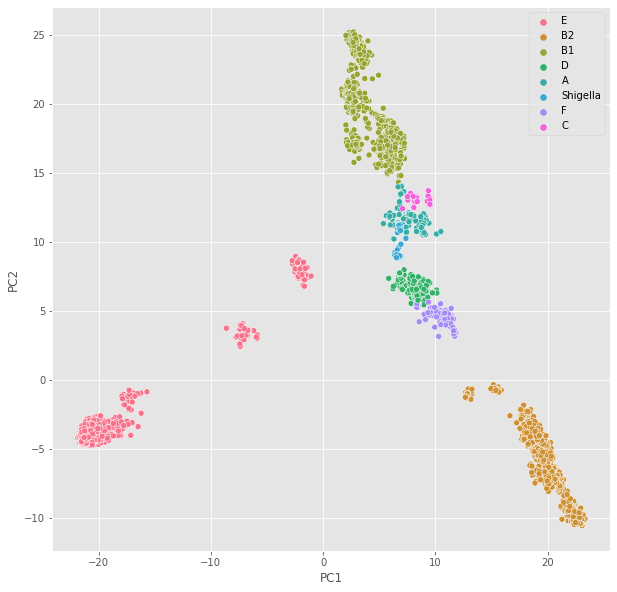

In [31]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(merged_df.iloc[:, :-1])
df_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', hue = merged_df.Phylogroup.tolist(), data=df_pca)
plt.savefig("figures/PCA_graph_BD_Phylogroup.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [32]:
large_data

,41004_G02_CONTIGS_PACBIO,50884_F01_CONTIGS_PACBIO,AIAW00000000,AIBY00000000,AIFN00000000,NC_002655,NC_002695,NC_011353,NC_013008,NC_017906,...,ESC_PA2010AA_AS,ESC_PA2013AA_AS,ESC_PA2014AA_AS,ESC_PA2016AA_AS,ESC_PA2019AA_AS,ESC_PA2021AA_AS,ESC_PA2023AA_AS,ESC_PA2315AA_AS,ESC_RA2551AA_AS,ESC_RA2561AA_AS
Strain,,,,,,,,,,,,,,,,,,,,,
Lineage,1,1,1,1,1,1,1,1,1,1,...,51,51,51,51,51,51,51,51,51,51
group_5501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_4783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_4456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_6055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
group_2149_7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_2067_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_2068_8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


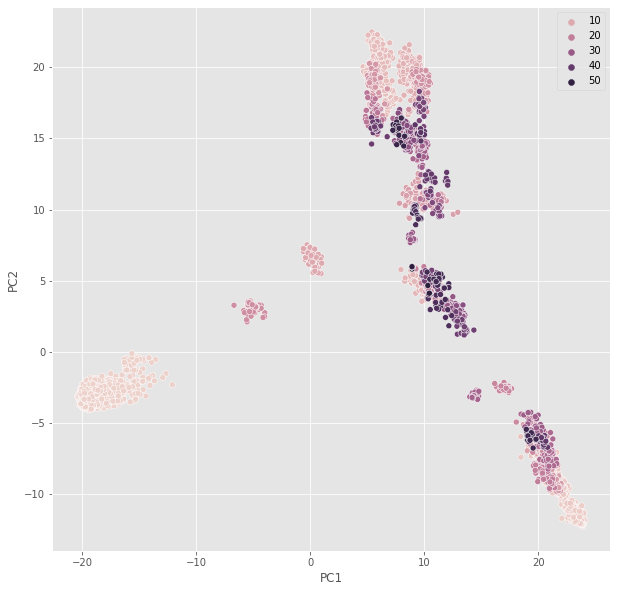

In [33]:
pca = PCA(n_components=2)
# row_sums = large_data.sum(axis=1)
# large_data[row_sums / 7512 >= 0.05]
data_pca = pca.fit_transform(large_data.transpose().iloc[:, 1:])
df_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', hue = large_data.transpose().Lineage.tolist(), data=df_pca)
plt.savefig("figures/PCA_graph_BD_Lineage.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [34]:
# large_data.transpose()['Lineage'].value_counts().sort_values()

In [35]:
sum(large_data.transpose().Lineage.tolist())

55565

In [36]:
large_data.transpose()['Lineage'].sum()

55565

In [37]:
data_pca

array([[-18.06612729,  -2.7606923 ],
       [-18.56573925,  -2.94612041],
       [-19.24621232,  -3.36349832],
       ...,
       [  8.93192667,   5.98450292],
       [ 10.45642985,   4.1214463 ],
       [ 10.32574108,   4.66359308]])

# 2) Data preprocessing


## 2.1) Dataset preprocessing 

In [38]:
large_data = pd.read_csv("data/F4_complete_presence_absence.csv", index_col=[0], header=[0])
large_data.columns = large_data.columns.str.upper()
phylogroup_data = pd.read_csv("data/accessionID_phylogroup_BD.csv", index_col=[0], header=[0])


In [39]:
data_without_lineage = large_data.drop(index=['Lineage'])
merged_df = pd.merge(data_without_lineage.transpose(), phylogroup_data, how='inner', left_index=True, right_on='ID')


In [40]:
numeric_cols = merged_df.select_dtypes(include='number')
column_sums = numeric_cols.sum(axis=0)

filtered_columns = column_sums[column_sums / 7512 >= 0.05].index
filtered_data = merged_df[filtered_columns]

filtered_data = merged_df[filtered_columns].copy()
filtered_data['Phylogroup'] = merged_df['Phylogroup']

data_array_t = np.array(filtered_data.iloc[:, :-1])
phylogroups_array = np.array(filtered_data.iloc[:, -1])

In [41]:
merged_df

,group_5501,group_4783,group_4456,group_6055,group_2859,group_3832,group_4223,group_2401,group_1236,group_3245,...,group_2066_1,mukF_1,group_955_2,group_1382_5,group_2149_7,group_2067_4,group_2068_8,group_2069_3,group_2071_4,Phylogroup
ID,,,,,,,,,,,,,,,,,,,,,
AIAW00000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
AIBY00000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
AIFN00000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
NC_002655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
NC_002695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ESC_PA2021AA_AS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,D
ESC_PA2023AA_AS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,D
ESC_PA2315AA_AS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,D


In [42]:
data_array_t.shape

(5953, 7580)

In [43]:
phylogroups_array.shape

(5953,)

## 2.2) Conversing the dataset into splits and dataloaders

In [44]:
data_array_t

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [45]:
phylogroups_array

array(['E', 'E', 'E', ..., 'D', 'D', 'D'], dtype=object)

In [52]:
# Convert to PyTorch tensor
data_tensor = torch.tensor(data_array_t, dtype=torch.float32)

# Split into train and test sets
train_data, temp_data, train_labels, temp_labels = train_test_split(data_tensor, phylogroups_array, test_size=0.3, random_state=12345)
val_data, test_data, val_labels, test_labels = train_test_split(temp_data, temp_labels, test_size=0.3333, random_state=12345)
test_phylogroups = test_labels

batch_size = 32

# TensorDataset
train_dataset = TensorDataset(train_data)
val_dataset = TensorDataset(val_data)
test_dataset = TensorDataset(test_data)

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Dataloader for overfitting on one sample (for dubbiging purposes)
input_dim = data_array_t.shape[1]
binary_data = torch.tensor(np.random.randint(0, 2, size=(1, input_dim)), dtype=torch.float32)
single_sample_dataset = TensorDataset(binary_data)
single_sample_loader = DataLoader(single_sample_dataset, batch_size=1, shuffle=True)

# Dataloader fot a small subset for overfitting (again, for debugging)
small_subset_indices = np.random.choice(len(train_dataset), size=256, replace=False)
small_subset = Subset(train_dataset, small_subset_indices)
small_loader = DataLoader(small_subset, batch_size=batch_size, shuffle=True)


# 3) Tetsing the model on one sample 

In [53]:
binary_data.type()

'torch.FloatTensor'

In [54]:
print(binary_data)

tensor([[0., 1., 0.,  ..., 1., 0., 1.]])


In [55]:
input_dim

7580

In [56]:
binary_data.shape

torch.Size([1, 7580])

In [57]:
# NO GRADIENT CLIPPING AND SCHEDULER 
hidden_dim = 512
latent_dim = 64
beta_start = 0.1
beta_end = 1.0
n_epochs = 10
input_dim = data_array_t.shape[1]

# Loading the model
model = VAE_single(input_dim, hidden_dim, latent_dim)

# model = VAE_single(input_dim, hidden_dim, latent_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Overfitting one sample to see if the model is broken 
num_epochs = 100

# Collecting data for visualisation 
train_loss_vals1 = []
train_loss_vals2 = []
kl_divergences_no_beta = []
kl_divergences_beta = []

model.train()

for epoch in range(num_epochs):
    beta = beta_start + (beta_end - beta_start) * epoch / n_epochs
    epoch_kl_divergence = 0
    epoch_kl_divergence_beta = 0 
    
    for data in single_sample_loader:
        data = data[0].to(torch.float)
        # print(data)
        
        optimizer.zero_grad()
        reconstruction, mu, logvar = model(data)
        
        reconstruction_loss = nn.functional.binary_cross_entropy(reconstruction, data, reduction='sum')
        # print(reconstruction_loss.item())
        
        kl_divergence_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
        kl_divergence_loss_beta = beta * kl_divergence_loss
        epoch_kl_divergence += kl_divergence_loss.item()
        epoch_kl_divergence_beta += kl_divergence_loss_beta.item()
        
        # Total loss
        loss = reconstruction_loss + kl_divergence_loss
        loss2 = reconstruction_loss + kl_divergence_loss_beta
        
        # Backpropagation
        loss.backward()
        optimizer.step()   

    if epoch % 100 == 0:
        print(f"Epoch {epoch}\nLoss (method1) = {loss.item()}\nLoss (method2) = {loss2.item()}")
        print("----------------------------------")

    train_loss_vals1.append(loss.item())
    train_loss_vals2.append(loss2.item())

    kl_divergences_no_beta.append(epoch_kl_divergence / len(single_sample_loader.dataset))
    kl_divergences_beta.append(epoch_kl_divergence_beta / len(single_sample_loader.dataset))

print(f"Final Loss after {num_epochs} epochs: {loss.item()}")

Epoch 0
Loss (method1) = 5361.54296875
Loss (method2) = 5317.14990234375
----------------------------------
Final Loss after 100 epochs: 16.236827850341797


In [58]:
torch.save(model.state_dict(), "models/saved_single_sample_VAE_BD.pt")
print("Model saved.")

Model saved.


In [59]:
# Load trained model 
model = VAE_single(input_dim, hidden_dim, latent_dim)
model.load_state_dict(torch.load('models/saved_single_sample_VAE_BD.pt'))  
model.eval()  

# Generate 10 new samples
num_samples = 10 
with torch.no_grad():
    z = torch.randn(num_samples, latent_dim)  # Sample from the standard normal distribution (????)
    generated_samples = model.decode(z).cpu().numpy() 

threshold = 0.5
binary_generated_samples = (generated_samples > threshold).astype(float)

print("Generated samples:\n", binary_generated_samples)
print("Generated samples:\n", generated_samples)

Generated samples:
 [[0. 1. 0. ... 1. 0. 1.]
 [0. 1. 0. ... 1. 0. 1.]
 [0. 1. 0. ... 1. 0. 1.]
 ...
 [0. 1. 0. ... 1. 0. 1.]
 [0. 1. 0. ... 1. 0. 1.]
 [0. 1. 0. ... 1. 0. 1.]]
Generated samples:
 [[0.00197134 0.9983327  0.0025945  ... 0.9979011  0.00211436 0.9980096 ]
 [0.00195976 0.99834466 0.00259676 ... 0.9978557  0.00208073 0.9979639 ]
 [0.00196762 0.9983966  0.00256976 ... 0.997806   0.00195701 0.9979316 ]
 ...
 [0.00192597 0.99838984 0.00266161 ... 0.99794596 0.00203819 0.99794835]
 [0.00199138 0.99836105 0.00254915 ... 0.99780434 0.00200292 0.99794847]
 [0.00200054 0.9983518  0.00259119 ... 0.99783665 0.00200722 0.9979899 ]]


# 4) testing the model on a bigger dataset (subset of train)

In [60]:
# Model inputs
hidden_dim = 512
latent_dim = 64
beta_start = 0.1
beta_end = 1.0
n_epochs = 10
input_dim = data_array_t.shape[1]

# Loading the model
model = VAE(input_dim, hidden_dim, latent_dim)

In [61]:
len(small_subset)

256

In [62]:
train_data.shape

torch.Size([4167, 7580])

In [63]:
val_data.shape

torch.Size([1190, 7580])

In [64]:
input_dim

7580

In [65]:
input_dim = data_array_t.shape[1]
hidden_dim = 512
latent_dim = 64
beta_start = 0.1
beta_end = 1.0

model = VAE(input_dim, hidden_dim, latent_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

model.train()
num_epochs = 100

# train_loss_vals1 = []
train_loss_vals2 = []
# kl_divergences_no_beta = []
kl_divergences_beta = []

for epoch in range(num_epochs):
    beta = beta_start + (beta_end - beta_start) * epoch / num_epochs
    epoch_kl_divergence_beta = 0
    for data in small_loader:
        data = data[0].to(torch.float)
        # print(data)
    
        optimizer.zero_grad()
        reconstruction, mu, logvar = model(data)
        
        reconstruction_loss = nn.functional.binary_cross_entropy(reconstruction, data, reduction='sum')
        # print(reconstruction_loss.item())

        kl_divergence_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
        kl_divergence_loss_beta = beta * kl_divergence_loss
        # epoch_kl_divergence += kl_divergence_loss.item()
        epoch_kl_divergence_beta += kl_divergence_loss_beta.item()
        
        # Total loss
        # loss = reconstruction_loss + kl_divergence_loss
        loss2 = reconstruction_loss + kl_divergence_loss_beta
        
        loss2.backward()
        optimizer.step()   

    if epoch % 100 == 0:
        print(f"Epoch {epoch}\nLoss (method 2) = {loss2.item()}")
        print("----------------------------------")

    # train_loss_vals1.append(loss.item())
    train_loss_vals2.append(loss2.item())

    # kl_divergences_no_beta.append(epoch_kl_divergence / len(small_loader.dataset))
    kl_divergences_beta.append(epoch_kl_divergence_beta / len(small_loader.dataset))

print(f"Final Loss after {num_epochs} epochs: {loss2.item()}")

Epoch 0
Loss (method 2) = 94845.0390625
----------------------------------
Final Loss after 100 epochs: 25417.50390625


In [66]:
torch.save(model.state_dict(), "models/saved_small_VAE1_BD.pt")
print("Model saved.")

Model saved.


# 5) Training of full dataset (train_full_dataset.py script on the CS account)

F1 Score: 0.96


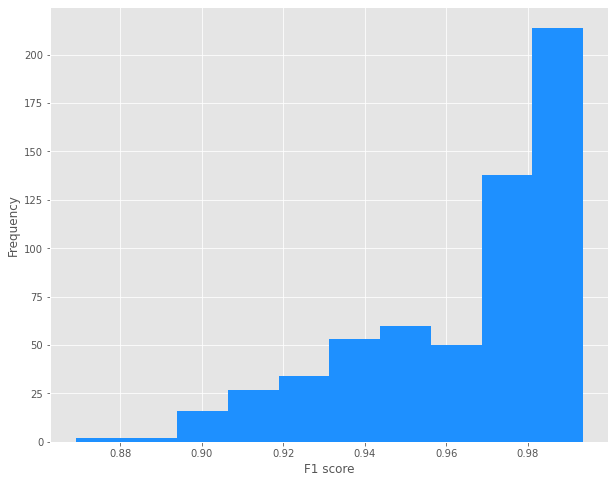

In [68]:
model = VAE(input_dim, hidden_dim, latent_dim)
model.load_state_dict(torch.load('models/saved_small_VAE1_BD.pt', map_location=torch.device('cpu')))  

model.eval()
all_recon_x = []
all_test_data = []

# Ploting the data into batches
with torch.no_grad():
    for batch in test_loader:
        batch_data = batch[0].to(device)
        recon_x, mu, logvar = model(batch_data)
        all_recon_x.append(recon_x.to(device))
        all_test_data.append(batch_data.to(device))

all_recon_x = torch.cat(all_recon_x)
all_test_data = torch.cat(all_test_data)

# Setting thershold 
recon_x_binarized = (all_recon_x > 0.5).int()

all_test_data_np = all_test_data.cpu().numpy().flatten()
recon_x_binarized_np = recon_x_binarized.cpu().numpy().flatten()

f1 = sklearn.metrics.f1_score(all_test_data_np, recon_x_binarized_np)
print(f'F1 Score: {f1:.2f}')

# Calcualting F1 score for each sample (comapring the target to reconstruction)
f1_scores = []
for genome_x, genome in zip(recon_x_binarized.cpu(), all_test_data.cpu().int()):
    f1_scores.append(sklearn.metrics.f1_score(genome_x.numpy(), genome.numpy()))

# Ploting a histogram of all calculated F1 scores 
plt.figure(figsize=(10,8))
plt.hist(f1_scores, color='dodgerblue')
plt.xlabel("F1 score")
plt.ylabel("Frequency")
plt.savefig("test.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [80]:
# model = VAE(input_dim, hidden_dim, latent_dim)
# model.load_state_dict(torch.load('models/DIFF MODEL.pt', map_location=torch.device('cpu')))  

# # Get latent variables
# latents = get_latent_variables(model, test_loader, device)

# # Apply t-SNE for dimensionality reduction
# name = "tsne_latent_space_visualisation_BD_100_new_2.pdf"
# # do_tsne(n_components=2, latents=latents, fig_name=name)
# tsne = TSNE(n_components=2)
# tsne_latents = tsne.fit_transform(latents)
# df_tsne = pd.DataFrame(tsne_latents, columns=['PC1', 'PC2'])
# df_tsne['phylogroup'] = test_phylogroups
# plt.figure(figsize=(10, 10))
# sns.scatterplot(x='PC1', y='PC2', hue = df_tsne['phylogroup'], data=df_tsne)
# plt.savefig(name, format="pdf", bbox_inches="tight")
# plt.show()

# # Apply PCA
# name = "pca_latent_space_visualisation_BD_100_new_2.pdf"
# # do_pca(n_components=2, latents=latents, fig_name=name)
# # Apply PCA
# pca = PCA(n_components=2)
# data_pca = pca.fit_transform(latents)
# df_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
# df_pca['phylogroup'] = test_phylogroups
# plt.figure(figsize=(10, 10))
# sns.scatterplot(x='PC1', y='PC2', hue = df_pca['phylogroup'], data=df_pca)
# plt.savefig(name, format="pdf", bbox_inches="tight")
# plt.show()